1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from scipy import stats


%matplotlib inline

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])


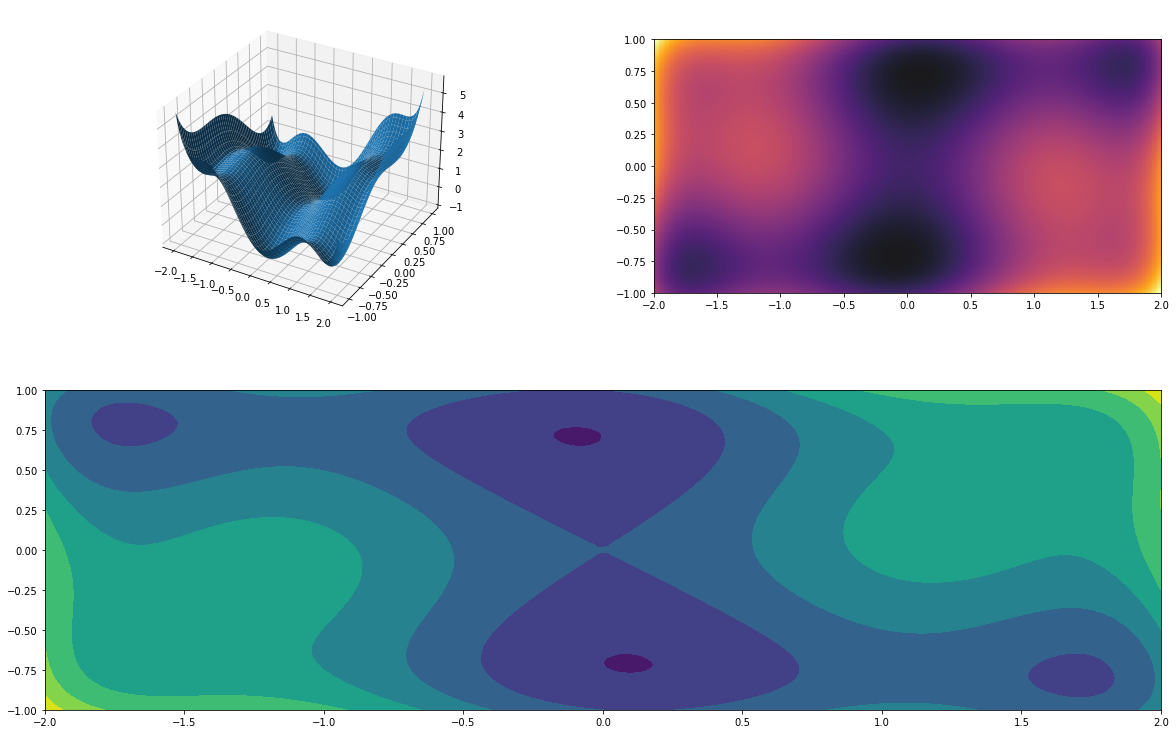

In [17]:
def f(x):
    return (4 - 2.1*x[0]**2 + x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2

x = np.array([np.linspace(-2,2,100), np.linspace(-1,1,100)])

initial_guess = np.array([0,0])
result = optimize.minimize(f, initial_guess)
print(result)

extent = np.min(x[0]), np.max(x[0]), np.min(x[1]), np.max(x[1])
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(321, projection='3d')
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(312)

X, Y = np.meshgrid(x[0], x[1])
zs = np.array([f(x) for x in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax1.plot_surface(X, Y, Z)
ax2.imshow(Z, cmap='inferno', alpha=.9, extent = extent)
ax3.contourf(X, Y, Z)

plt.show()

In [18]:
initial_guess = np.array([0,1])
result = optimize.minimize(f, initial_guess)
print(result)

      fun: -1.031628453489791
 hess_inv: array([[ 0.12834732, -0.00788045],
       [-0.00788045,  0.06138297]])
      jac: array([-2.08616257e-07, -1.53481960e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([-0.08984203,  0.7126563 ])


In [19]:
initial_guess = np.array([0,-1])
result = optimize.minimize(f, initial_guess)
print(result)

      fun: -1.0316284534898152
 hess_inv: array([[ 0.1283473 , -0.00788036],
       [-0.00788036,  0.06138296]])
      jac: array([1.93715096e-07, 1.53481960e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.08984202, -0.71265632])


There are 2 global minima at $(0.09, -0.71)$ and $(-0.09, 0.71)$ as can be seen by the minima found from the two different starting point and according to the plots. Starting from the point $(0,0)$ the iteration remains stucked at $(0,0)$ which is a saddle point.

Using the Powell method one can avoid the issue.

In [20]:
initial_guess = np.array([0,0])
result = optimize.minimize(f, initial_guess, method='Powell')
print(result)

   direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [-6.21111406e-04,  4.70877838e-05]])
     fun: -1.0316284534898421
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 3
  status: 0
 success: True
       x: array([-0.08984201,  0.71265634])


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Max:		 5.735815722449982 +/- 0.006315137569096677
Min:		 6.164525993863211 +/- 0.002228499116720399
Compatibility:	 64.01715407459226


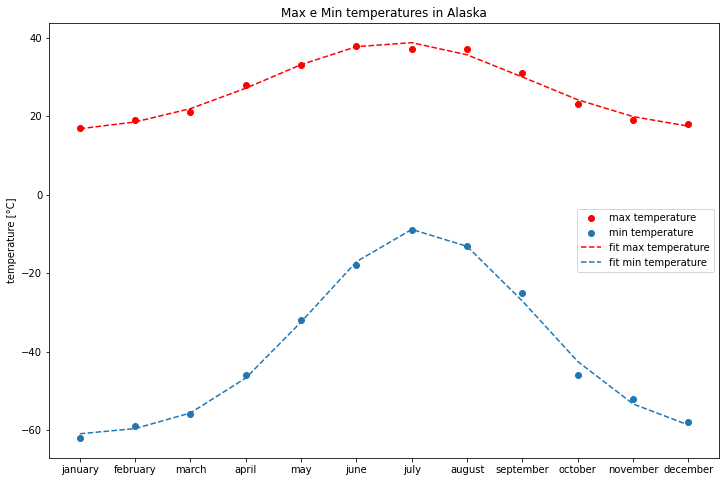

In [21]:
Tmax   = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
Tmin   = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)
Months = ['january', 'february',     'march',
            'april',      'may',      'june',
             'july',   'august', 'september',
          'october', 'november',  'december']

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.scatter(Months, Tmax, c='r', label='max temperature')
ax1.scatter(Months, Tmin, c='C0', label='min temperature')
ax1.set_ylabel('temperature [°C]')
#ax1.set_xlabel('# month')
ax1.set_title('Max e Min temperatures in Alaska')


def gaussian(x, N, mu, sig, offset):
    return N * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) + offset

poptMax, pcovMax = optimize.curve_fit(gaussian, months, Tmax, p0 = [20,6, 2, 20])
poptMin, pcovMin = optimize.curve_fit(gaussian, months, Tmin, p0 = [40,6, 2, -60])
ax1.plot(months, gaussian(months, poptMax[0],poptMax[1],poptMax[2], poptMax[3]), linestyle='dashed',c = 'r', label='fit max temperature')
ax1.plot(months, gaussian(months, poptMin[0],poptMin[1],poptMin[2], poptMin[3]), linestyle='dashed', c = 'C0', label='fit min temperature')
ax1.legend(loc = 'center right')

comp = np.abs(poptMax[1] - poptMin[1]) / np.sqrt(pcovMax[1,1]**2 + pcovMin[1,1]**2)
print('Max:\t\t', poptMax[1], '+/-', pcovMax[1,1])
print('Min:\t\t', poptMin[1], '+/-', pcovMin[1,1])
print('Compatibility:\t',comp)

The result is reasonable, I would expect the funcion to be periodic. Anyhow, the gaussian fits smoothly the data during the year.

From basic statistics, we can say that the two distributions do not have a compatible shift within the fit accuracy. Maybe changing fit function the parameters would be compatible.


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [22]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P ../data/

R2 			=		 0.9778404584239446 
R 			=		 0.9888581589004283

Covariance matrix:
 [[ 1.         -0.06052469]
 [-0.06052469  1.        ]]

n degrees of freedom 	=		 102

chi2 			=		 7248.226844985533
p-value 		=		 0.0


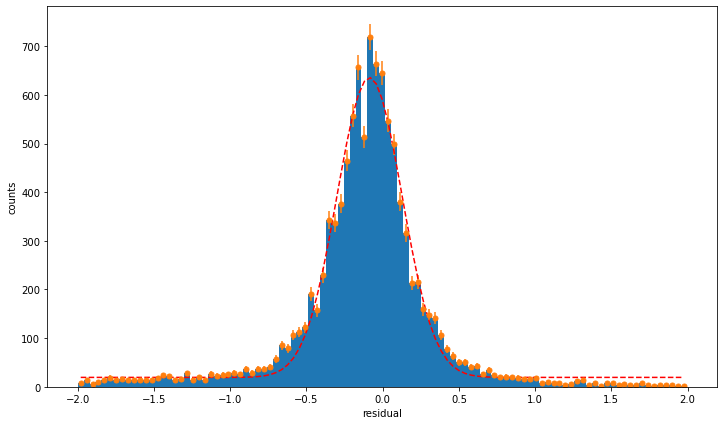

In [23]:
import pickle

filename = '../data/residuals_261.pkl'
with open(filename, 'rb') as f:
    data = pickle.load(f)

data = data.reshape(1)[0]['residuals']
data = data[abs(data)<2]
b = np.histogram_bin_edges(data, bins='sqrt')

fig, ax = plt.subplots(figsize=(12, 7))
entries, edges, _ = ax.hist(data, bins = b, label = 'Histogram')
ax.set_xlabel('residual')
ax.set_ylabel('counts')

# calculate bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
sigma_y = np.sqrt(np.abs(entries))
mask = (sigma_y!=0)
#sigma_y[mask] = np.nan
ax.errorbar(bin_centers[mask], entries[mask], yerr=sigma_y[mask], fmt='o', ms = 5)

def gaussian(x, N, mu, sig, offset):
    return N * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) + offset

popt, pcov = optimize.curve_fit(gaussian, bin_centers, entries, p0 = [600,-0.2, .9, 20])
ax.plot(bin_centers, gaussian(bin_centers, popt[0],popt[1],popt[2], popt[3]), linestyle='dashed',c = 'r' )

ssr = np.sum((entries - gaussian(bin_centers, popt[0],popt[1],popt[2], popt[3]))**2)
tss = np.sum((np.mean(entries) - entries)**2)

rsq = 1 - ssr / tss

print("R2 \t\t\t=\t\t", rsq, "\nR \t\t\t=\t\t", np.sqrt(rsq))
print("\nCovariance matrix:\n", np.corrcoef(bin_centers,entries)) # check with the correlation matrix that R is the correlation coefficient

ndof = len(bin_centers[mask]) - 1
print("\nn degrees of freedom \t=\t\t", ndof)
# calculate the chi^2
chi2 = np.sum(((entries[mask] - (gaussian(bin_centers[mask], popt[0],popt[1],popt[2], popt[3])))**2) / sigma_y[mask])
print("\nchi2 \t\t\t=\t\t", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value \t\t=\t\t", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

The p-value is $< 0.5$, meaning the fit is unsatisfactory.

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [24]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P ../data/

			--------BEST PARAMETERS--------			
a		=		 -9.96203467789479 	+/-	 0.017555820167411317
b		=		 12.331742857750834 	+/-	 0.00017732637530163198
c		=		 9.262821311360776 	+/-	 0.008788533253920554



Overall temperature (data):	 9.261252084167236
Overall temperature (model):	 9.261252083954993



Average minimum:		 -0.6992133665339981
Average maximum:		 19.224855989255545


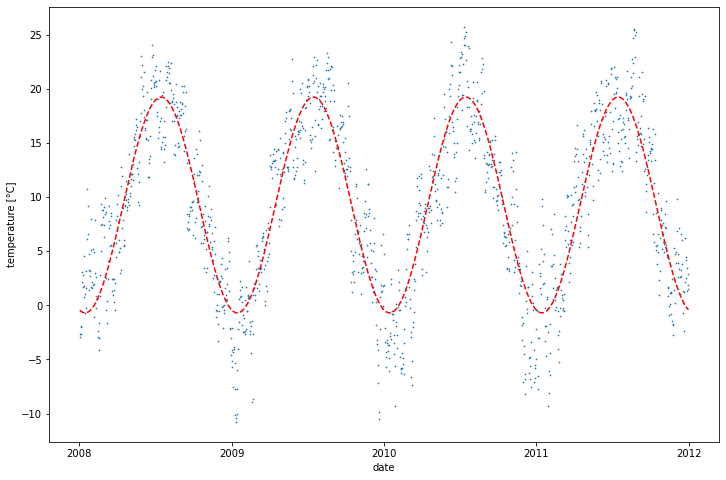

In [25]:
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

def f(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

df = pd.read_csv('../data/munich_temperatures_average_with_bad_data.txt', sep=' ', names=['year', 'temperature'])
mask = (df['year'] > 2008) & (df['year'] <= 2012)
df_range = df[mask]
mask = df_range['temperature'] < 30
df_range = df_range[mask]

popt, pcov = optimize.curve_fit(f, df_range.year, df_range.temperature)

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.scatter(df_range.year, df_range.temperature, s = 0.5, marker='x')
ax1.plot(df_range.year, f(df_range.year, popt[0],popt[1],popt[2]), linestyle='dashed',c = 'r' )
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.set_ylabel('temperature [°C]')
ax1.set_xlabel('date')

print('\t\t\t--------BEST PARAMETERS--------\t\t\t')
print("a\t\t=\t\t", popt[0], '\t+/-\t', pcov[0,0])
print("b\t\t=\t\t", popt[1], '\t+/-\t', pcov[1,1])
print("c\t\t=\t\t", popt[2], '\t+/-\t', pcov[2,2])
print('\n\n')
print('Overall temperature (data):\t', df_range.temperature.mean())
print('Overall temperature (model):\t', f(df_range.year, popt[0],popt[1],popt[2]).mean())
print('\n\n')
min = []
max = []
min.append(optimize.minimize(f, 2007, args=(popt[0],popt[1],popt[2])).fun)
min.append(optimize.minimize(f, 2008, args=(popt[0],popt[1],popt[2])).fun)
min.append(optimize.minimize(f, 2009, args=(popt[0],popt[1],popt[2])).fun)
min.append(optimize.minimize(f, 2010, args=(popt[0],popt[1],popt[2])).fun)
min.append(optimize.minimize(f, 2011, args=(popt[0],popt[1],popt[2])).fun)

def f1(t, a, b, c):
    return -(a * np.cos(2*np.pi*t + b) + c)
max.append(-optimize.minimize(f1, 2008, args=(popt[0],popt[1],popt[2])).fun)
max.append(-optimize.minimize(f1, 2009, args=(popt[0],popt[1],popt[2])).fun)
max.append(-optimize.minimize(f1, 2010, args=(popt[0],popt[1],popt[2])).fun)
max.append(-optimize.minimize(f1, 2011, args=(popt[0],popt[1],popt[2])).fun)

print('Average minimum:\t\t',np.array(min).mean())
print('Average maximum:\t\t',np.array(max).mean())

The parameter $b$ is the phase which is a offset in the x axis.

SSR: 18669.51539457836 18669.225430686973
Test f vs g:
CL: 0.832 , additional parameter necessary: NO


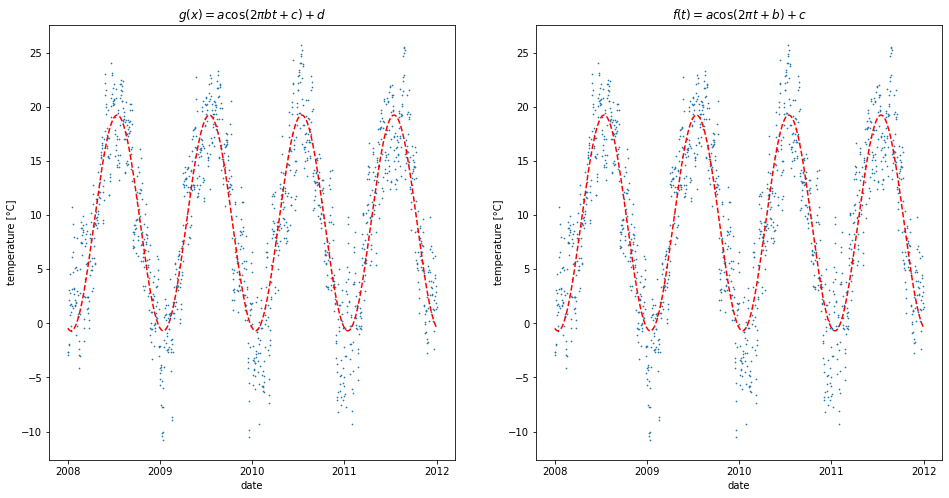

In [26]:
def g(t, a, b, c, d):
    return a * np.cos(2*np.pi*b*t + c) + d

poptg, pcovg = optimize.curve_fit(g, df_range.year, df_range.temperature)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
ax1.scatter(df_range.year, df_range.temperature, s = 0.5, marker='x')
ax1.plot(df_range.year, g(df_range.year, poptg[0],poptg[1],poptg[2], poptg[3]), linestyle='dashed',c = 'r' )
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.set_ylabel('temperature [°C]')
ax1.set_xlabel('date')
ax1.set_title('$g(x) = a \cos(2\pi b t + c)+d$')
ax2.scatter(df_range.year, df_range.temperature, s = 0.5, marker='x')
ax2.plot(df_range.year, f(df_range.year, popt[0],popt[1],popt[2]), linestyle='dashed',c = 'r' )
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.set_ylabel('temperature [°C]')
ax2.set_xlabel('date')
ax2.set_title('$f(t) = a \cos(2\pi t + b)+c$')

yf    = f(df_range.year,  popt[0], popt[1], popt[2])
yg    = g(df_range.year, poptg[0],poptg[1],poptg[2],poptg[3])
ssr_f = np.sum((yf - df_range.temperature)**2)
ssr_g = np.sum((yg - df_range.temperature)**2)

print("SSR:", ssr_f, ssr_g)

# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

# run F-test
ndof_f = 3 - 1 # n of parameters - 1
ndof_g = 4 - 1 # n of parameters - 1
print("Test f vs g:")
cl_f_vs_g = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, df_range.size, verbose=True)